# InstaCart - Fill That Cart!

## Introduction

Instacart is a grocery delivery platform that allows me to place orders and have them delivered to my doorstep, similar to services like Uber Eats and DoorDash. The dataset I have been provided has been adjusted from its original version. The size of the dataset was reduced to facilitate faster calculations, and missing values and duplicates were introduced. These modifications were carefully made to preserve the original data distributions.

## Data Dictionary

There are five tables in the dataset, and I will need to use all of them for data preprocessing and exploratory data analysis. Below is a data dictionary that lists the columns of each table and describes the data they contain.

- instacart_orders.csv: Each row corresponds to an order in the Instacart application.
    - `'order_id'`: Unique ID number identifying each order.
    - `'user_id'`: Unique ID number identifying each customer's account.
    - `'order_number'`: The number of times this customer has placed an order.
    - `'order_dow'`: Day of the week the order was placed (0 if Sunday).
    - `'order_hour_of_day'`: Hour of the day the order was placed.
    - `'days_since_prior_order'`: Number of days since this customer placed their previous order.

- products.csv: Each row corresponds to a unique product that customers can purchase.
    - `'product_id'`: Unique ID number identifying each product.
    - `'product_name'`: Name of the product.
    - `'aisle_id'`: Unique ID number identifying each grocery aisle category.
    - `'department_id'`: Unique ID number identifying each grocery department.

- order_products.csv: Each row corresponds to an item ordered in an order.
    - `'order_id'`: Unique ID number identifying each order.
    - `'product_id'`: Unique ID number identifying each product.
    - `'add_to_cart_order'`: The sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have ordered it.

- aisles.csv
    - `'aisle_id'`: Unique ID number identifying each grocery aisle category.
    - `'aisle'`: Name of the aisle.

- departments.csv
    - `'department_id'`: Unique ID number identifying each grocery department.
    - `'department'`: Name of the department.

## Step 1. Data Description

To begin, we start by importing the libraries which will be the base for this project.

After that, I'm going to read the data files using the pd.read_csv() function in Python. After loading the data, I will verify the information for each DataFrame to ensure they have been read correctly and to understand the structure and content of each dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Datasets and Storing in Variables

instacart_orders_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/instacart_orders.csv')
products_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/products.csv')
order_products_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/order_products.csv.zip')
aisles_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/aisles.csv')
departments_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/departments.csv')

To understand exactly what each dataset contains, I will print the first few rows of each DataFrame. This step will help me verify that the data has been imported correctly and provide a clear view of the structure and contents of each dataset.

In [3]:
# Instacart Orders
print('Instacart Oders')
print()
print(instacart_orders_df.head(3))
print('-' * 100)

# Products
print('Products')
print()
print(products_df.head(3))
print('-' * 100)

# Order Products
print('Order Products')
print()
print(order_products_df.head(3))
print('-' * 100)

# Aisles
print('Aisles')
print()
print(aisles_df.head(3))
print('-' * 100)

# Departments
print('Departments')
print()
print(departments_df.head(3))
print('-' * 100)

Instacart Oders

  order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0                        1515936;183418;11;6;13;30.0                              
1                          1690866;163593;5;5;12;9.0                              
2                           1454967;39980;4;5;19;2.0                              
----------------------------------------------------------------------------------------------------
Products

  product_id;product_name;aisle_id;department_id
0             1;Chocolate Sandwich Cookies;61;19
1                      2;All-Seasons Salt;104;13
2    3;Robust Golden Unsweetened Oolong Tea;94;7
----------------------------------------------------------------------------------------------------
Order Products

  order_id;product_id;add_to_cart_order;reordered
0                            2141543;11440;17.0;0
1                               567889;1560;1.0;1
2                             2261212;26683;1.0;1
---------------------------

Also, I will proceed to print the <b>information</b> of each DataFrame:

In [4]:
# Instacart Orders
print('-' * 100)
print("Instacart Orders:")
print()
print(instacart_orders_df.info())
print('-' * 100)

# Product
print("Product:")
print()
print(products_df.info())
print('-' * 100)

# Order Product
print("Order Product:")
print()
print(order_products_df.info())
print('-' * 100)

# Aisles
print("Aisles:")
print()
print(aisles_df.info())
print('-' * 100)

# Departments
print("Departments:")
print()
print(departments_df.info())
print('-' * 100)


----------------------------------------------------------------------------------------------------
Instacart Orders:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB
None
----------------------------------------------------------------------------------------------------
Product:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;produ

<b>Observations:</b>

1.- <b>Incorrect Delimiters:</b>

First and foremost, the data in the DataFrames is incorrectly delimited, as all columns are being interpreted as a single column instead of the multiple expected columns. In fact, a preliminary review was conducted with each CSV file in Excel (except for the order_products dataset, which contains over 4 million records), confirming that all columns are indeed stored in a single cell.

This issue arises because the delimiters used in the CSV files are incorrect, resulting in the mixing of data from different columns into a single column.

2.- <b>Incorrect Dtypes:</b>

All columns are being interpreted as object type (string). This is likely due to how the data is being read, where all columns are treated as a single column due to the incorrect delimiter.

To correct this, I will take the following actions:

a. I will specify the delimiters using the delimiter= parameter in pd.read_csv.

b. I will strip any leading or trailing spaces from the column names, just in case.

In [5]:
instacart_orders_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/instacart_orders.csv', delimiter=';', skipinitialspace=True)
instacart_orders_df.columns = instacart_orders_df.columns.str.strip()

products_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/products.csv', delimiter=';', skipinitialspace=True)
products_df.columns = products_df.columns.str.strip()

order_products_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/order_products.csv.zip', delimiter=';', skipinitialspace=True)
order_products_df.columns = order_products_df.columns.str.strip()

aisles_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/aisles.csv', delimiter=';', skipinitialspace=True)
aisles_df.columns = aisles_df.columns.str.strip()

departments_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/departments.csv', delimiter=';', skipinitialspace=True)
departments_df.columns = departments_df.columns.str.strip()

Let's see how they display

In [6]:
print('-' * 100)
print('Instacart Oders')
print()
print(instacart_orders_df.head(3))

print('-' * 100)
print('Products')
print()
print(products_df.head(3))

print('-' * 100)
print('Order Products')
print()
print(order_products_df.head(3))

print('-' * 100)
print('Aisles')
print()
print(aisles_df.head(3))

print('-' * 100)
print('Departments')
print()
print(departments_df.head(3))

print('-' * 100)

----------------------------------------------------------------------------------------------------
Instacart Oders

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
----------------------------------------------------------------------------------------------------
Products

   product_id                          product_name  aisle_id  department_id
0           1            Chocolate Sandwich Cookies        61             19
1           2                      All-Seasons Salt       104             13
2           3  Robust Golden Unsweetened Oolong Tea        94              7
------------------------------------------------------------------------------

Perfect, everything is now aligned.
Now, let's see what information the dataset <b>AFTER</b> fixing the delimiters provides us:

In [7]:
print("Instacart Orders:")
print()
print(instacart_orders_df.info())
print('-' * 100)

print("Product:")
print()
print(products_df.info())
print('-' * 100)

print("Order Product:")
print()
print(order_products_df.info())
print('-' * 100)

print("Aisles:")
print()
print(aisles_df.info())
print('-' * 100)

print("Departments:")
print()
print(departments_df.info())
print('-' * 100)

Instacart Orders:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
----------------------------------------------------------------------------------------------------
Product:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null 

Excellent, the columns now each contain their respective data types and count of null values.
Now let's review each part:

<b>1. Number of Columns:</b>

All DataFrames now appear to have the correct number of columns, and the data is correctly separated into individual columns, indicating that the delimiter issue has been resolved.

<b>2. Dtypes:</b>

The data types seem to be appropriately assigned in most columns of each DataFrame. However, in order_products_df, the add_to_cart_order column is being interpreted as a floating-point type (float64) instead of an integer type (int64). This may need correction if necessary for analysis purposes. The same applies to the days_since_prior_order column in the instacart_orders_df.

<b>3. Null Values:</b>

In some DataFrames, such as instacart_orders_df and products_df, there are null values present in certain columns. For instance, in instacart_orders_df, the days_since_prior_order column has null values (exactly 28,819 null values). Additionally, the product_name column in the products_df has 1,258 null values.

These null values are important to consider during analysis and should be handled appropriately if necessary.

The aisles_df and departments_df DataFrames contain information about aisle categories and departments, respectively. There are no null values in these columns, and the data types appear to be appropriate.

It's noteworthy that the order_products_df information does not display the Non-null column. Why might this be? Let's check using the .isnull() method to investigate further.

In [8]:
print("Null Values count in DataFrame Order_Products:")
print(order_products_df.isnull().sum())

Null Values count in DataFrame Order_Products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


Interesting; 836 null values in the `add_to_cart_order` column, but they are not shown with the `.info()` method... Could this be because it is a data type of float64?

## Step 2. Data Preprocessing

Preprocess the data as follows:

- Verify and correct data types (e.g., ensure that ID columns are integers).

In [9]:
# Verification of data types for each column by DataFrame

print("Data types of Instacart Orders:")
print(instacart_orders_df.dtypes)

print("\nData types of Products:")
print(products_df.dtypes)

print("\nData types of Order Products:")
print(order_products_df.dtypes)

print("\nData types of Aisles:")
print(aisles_df.dtypes)

print("\nData types of Departments:")
print(departments_df.dtypes)

Data types of Instacart Orders:
order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

Data types of Products:
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

Data types of Order Products:
order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

Data types of Aisles:
aisle_id     int64
aisle       object
dtype: object

Data types of Departments:
department_id     int64
department       object
dtype: object


We have a total of 18 columns:
- 13 of them are integers.
- 3 of them are objects.
- 2 of them are floats.

Previously, we discussed our concerns regarding the columns of type float. Specifically, we are referring to the 'days_since_prior_order' column in the Instacart Orders DataFrame and the 'add_to_cart_order' column in the Order Products DataFrame. It may be appropriate to change them to another data type based on the following reasoning:

- `'days_since_prior_order'`: This column indicates the days elapsed since the previous order. It provides insights into the frequency of user orders and is valuable for analyzing customer purchasing habits.

Changing this column to type int makes sense in our analysis context due to the nature of the data and the potential future operations we may perform. This column represents discrete and non-fractional time measurements. Converting it to int simplifies its representation and facilitates interpretation as whole days. Working with integer data enables more precise statistical calculations, such as computing average days between orders for specific users. This will provide valuable insights into customer buying habits and support data-driven decision-making.

- `'add_to_cart_order'`: This column indicates the sequence in which each product was added to the cart during a specific order. Each time a customer places an order, selected products are added to the cart in a specific order.

Changing the 'add_to_cart_order' column to integer (int) data type is appropriate for our data analysis. This column records the sequential order in which products were added to the cart during an order, typically represented as sequential integer numbers. Converting it to int simplifies its representation and enhances its interpretation as a numerical sequence of cart orders. Using integer data facilitates more accurate and efficient statistical calculations, such as calculating the average or median order of products in the cart. This deeper understanding of customer purchasing behavior will inform data-driven decisions.

Let's proceed with changing them from float to int:

In [10]:
# Conversion of the 'days_since_prior_order' column to integer data type
instacart_orders_df['days_since_prior_order'] = pd.to_numeric(instacart_orders_df['days_since_prior_order'], errors='coerce').astype('Int64')

# Conversion of the 'add_to_cart_order' column to integer data type
order_products_df['add_to_cart_order'] = pd.to_numeric(order_products_df['add_to_cart_order'], errors='coerce').astype('Int64')

print("Data type of the 'days_since_prior_order' column in Instacart Orders:")
print(instacart_orders_df['days_since_prior_order'].dtypes)
print()
print(instacart_orders_df['days_since_prior_order'].sample(5))
print('-' * 50)

print("Data types of the 'add_to_cart_order' column in Order Products:")
print(order_products_df['add_to_cart_order'].dtypes)
print()
print(order_products_df['add_to_cart_order'].sample(5))
print('-' * 50)

Data type of the 'days_since_prior_order' column in Instacart Orders:
Int64

131665    11
253250    30
431690     9
476246     7
140839     3
Name: days_since_prior_order, dtype: Int64
--------------------------------------------------
Data types of the 'add_to_cart_order' column in Order Products:
Int64

1023129     3
3539479     1
1038055    12
4268463    13
4259964    11
Name: add_to_cart_order, dtype: Int64
--------------------------------------------------


Okay, let's review the null values in each DataFrame.

In [11]:
print("Null values in Instacart Orders:")
print(instacart_orders_df.isnull().sum())
print('-' * 35)

print("\nNull values in Products:")
print(products_df.isnull().sum())
print('-' * 35)

print("\nNull values in Order Products:")
print(order_products_df.isnull().sum())
print('-' * 35)

print("\nNull values in Aisles:")
print(aisles_df.isnull().sum())
print('-' * 35)

print("\nNull values in Departments:")
print(departments_df.isnull().sum())
print('-' * 35)


Null values in Instacart Orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64
-----------------------------------

Null values in Products:
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
-----------------------------------

Null values in Order Products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
-----------------------------------

Null values in Aisles:
aisle_id    0
aisle       0
dtype: int64
-----------------------------------

Null values in Departments:
department_id    0
department       0
dtype: int64
-----------------------------------


Let's consider the following:
Here we have a list of columns with null values along with the total number of records in each column and the number of null values:

<b>Instacart Orders:</b>
- Column: `'days_since_prior_order'`.
- Total records: 478,967.
- Null values: 28,819.
- Percentage of null values: 6.02%.

<b>Products:</b>
- Column: `'product_name'`.
- Total records: 49,694.
- Null values: 1,258.
- Percentage of null values: 2.53%.

<b>Order Products:</b>
- Column: `'add_to_cart_order'`.
- Total records: 4,545,007.
- Null values: 836.
- Percentage of null values: 0.02%.

According to my reasoning, here are the actions I believe we should take to manage these null values:

<b>1.- I will impute the null values in the Instacart Orders DataFrame by changing them to AVERAGE:</b>

By imputing the missing values in the 'days_since_prior_order' column using the average days since the last order, I will be applying a strategy that will preserve data integrity and obtain a representative estimate of this crucial attribute in analyzing customer purchasing habits.

This decision will allow us to maintain the total amount of data available for analysis, which can be essential for understanding general trends in purchasing behavior and making meaningful inferences about consumption patterns over time.

I'll note in advance that <b>11 days</b> is the average number of days between orders in the app.

<b>2.- Assignment of string "unknown" to null values in the Products DataFrame:</b>

The decision to assign the label "unknown" to null values in the 'product_name' column is based on the need to preserve information integrity without losing the distinction between known and unknown products.

By providing a clear designation for missing values, I am ensuring transparency and interpretability of the data while maintaining the structure of the original dataset. This facilitates the identification and appropriate handling of unknown products during analysis without compromising the quality of available information.

<b>3.- Removal of rows with null values in the Order Products DataFrame:</b>

The decision to delete rows with null values in this DataFrame is based on the need to simplify the dataset and avoid potential complications from handling missing values in subsequent analyses.

By removing these observations, I am reducing the complexity of the dataset and improving the efficiency of subsequent analyses by working with a cleaner and more homogeneous dataset. It's important to note that these are only 836 records out of 4,545,007.

Let's start with the first step:

<b>1.- Imputation of null values in the Instacart Orders DataFrame by replacing them with the AVERAGE:</b>

For this, I had to convert the data type of the column back to float, since Python wouldn't allow me to calculate the mean with integer data types 🙄😒

In [12]:
# Convert to float
instacart_orders_df['days_since_prior_order'] = instacart_orders_df['days_since_prior_order'].astype(float)

# Calculate the mean of non-null values in the 'days_since_prior_order' column and fill missing values with the mean
instacart_orders_df['days_since_prior_order'].fillna(instacart_orders_df['days_since_prior_order'].mean(skipna=True), inplace=True)

Ok, now, let's convert the data back to integers, print a sample with the 'days_since_prior_order' column of interest to take a look at the table, and verify that there are no more null values; note that values marked with <b>11</b> are the ones that changed:

In [13]:
instacart_orders_df['days_since_prior_order'] = instacart_orders_df['days_since_prior_order'].astype(int)
print(instacart_orders_df['days_since_prior_order'].dtype)
print()
print(instacart_orders_df['days_since_prior_order'].sample(10, random_state=42))
print()
print("Null values in the 'days_since_prior_order' column after imputation:", instacart_orders_df['days_since_prior_order'].isnull().sum())

int64

478011    11
176737     3
402189     7
111658     1
59935      7
394390     4
353950     9
245929     9
472336     8
226025     5
Name: days_since_prior_order, dtype: int64

Null values in the 'days_since_prior_order' column after imputation: 0


Excelent, now, let's move on to the DataFrame Products:

<b>2.- Assigning string "unknown" to null values in the Products DataFrame:</b>

In the 'product_name' column, which contains 1258 missing values, we will fill them with "unknown":

In [14]:
products_df['product_name'].fillna('unknown', inplace=True)

print(products_df['product_name'].sample(10))
print()
print("Null values in the 'product_name' column after converting them to 'unknown':", products_df['product_name'].isnull().sum())
print()
print("How many 'unknown' entries exist in the column? This is to verify if they match the 1258 null values that existed before the change:", products_df['product_name'].value_counts()['unknown'])

3355                        Gluten Free Almond Horn Cookie
35948                 Camilia Teething Relief Single Doses
45192                          Brownies Ala Mode Ice Cream
8955                Coconut Breaded Chicken Breast Tenders
19341         Medium Concentrated Tikka Masala Curry Paste
2143                                               Doritos
32051                    Organic Brown Rice Cake Salt-Free
36312    Organic Vitality Snack Strawberry Banana Chia ...
46410                           Dark Chocolate Almonds Bar
48573                           Spicy! Plant-based  Cheeze
Name: product_name, dtype: object

Null values in the 'product_name' column after converting them to 'unknown': 0

How many 'unknown' entries exist in the column? This is to verify if they match the 1258 null values that existed before the change: 1258


Ok, finally, let's proceed with:

<b>3.- Deleting rows with null values in the Order Products DataFrame:</b>

We will remove the null values from the 'add_to_cart_order' column, as previously stated, deleting 0.02% of the records in this DataFrame will not compromise our analysis in any way.

In [15]:
order_products_df.dropna(subset=['add_to_cart_order'], inplace=True)

print("Null valies in 'add_to_cart_order' columns after deleting them:", order_products_df['add_to_cart_order'].isnull().sum())

Null valies in 'add_to_cart_order' columns after deleting them: 0


Let's do a final review of null values in each DataFrame before moving on to the next point:

In [16]:
print("Null values in the Instacart Orders DataFrame:")
print(instacart_orders_df.isnull().sum())
print('-' * 30)

print("\nNull values in the Products DataFrame:")
print(products_df.isnull().sum())
print('-' * 30)

print("\nNull values in the Order Products DataFrame:")
print(order_products_df.isnull().sum())
print('-' * 30)

print("\nNull values in the Aisles DataFrame:")
print(aisles_df.isnull().sum())
print('-' * 30)

print("\nNull values in the Departments DataFrame:")
print(departments_df.isnull().sum())
print('-' * 30)


Null values in the Instacart Orders DataFrame:
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64
------------------------------

Null values in the Products DataFrame:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
------------------------------

Null values in the Order Products DataFrame:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
------------------------------

Null values in the Aisles DataFrame:
aisle_id    0
aisle       0
dtype: int64
------------------------------

Null values in the Departments DataFrame:
department_id    0
department       0
dtype: int64
------------------------------


Great! We've resolved the issue of null values in all our DataFrames 😎

Let's check the number of duplicates in each of our DataFrames, including all columns.

In [17]:
# Checking Duplicates in each DataFrame

# Instacart Orders
print("Duplicates in Instacart Orders DataFrame:", instacart_orders_df.duplicated().sum())
print("Column order_id:", instacart_orders_df['order_id'].duplicated().sum())
print("Column user_id:", instacart_orders_df['user_id'].duplicated().sum())
print("Column order_number:", instacart_orders_df['order_number'].duplicated().sum())
print("Column order_dow:", instacart_orders_df['order_dow'].duplicated().sum())
print("Column order_hour_of_day:", instacart_orders_df['order_hour_of_day'].duplicated().sum())
print("Column days_since_prior_order:", instacart_orders_df['days_since_prior_order'].duplicated().sum())

# Products
print('-' * 50)
print("Duplicates in Products DataFrame:", products_df.duplicated().sum())
print("Column product_id:", products_df['product_id'].duplicated().sum())
print("Column product_name:", products_df['product_name'].duplicated().sum())
print("Column aisle_id:", products_df['aisle_id'].duplicated().sum())
print("Column department_id:", products_df['department_id'].duplicated().sum())

# Order Products
print('-' * 50)
print("Duplicates in Order Products DataFrame:", order_products_df.duplicated().sum())
print("Column order_id:", order_products_df['order_id'].duplicated().sum())
print("Column product_id:", order_products_df['product_id'].duplicated().sum())
print("Column add_to_cart_order:", order_products_df['add_to_cart_order'].duplicated().sum())
print("Column reordered:", order_products_df['reordered'].duplicated().sum())

# Aisles
print('-' * 50)
print("Duplicates in Aisles DataFrame:", aisles_df.duplicated().sum())
print("Column aisle_id:", aisles_df['aisle_id'].duplicated().sum())
print("Column aisle:", aisles_df['aisle'].duplicated().sum())

# Departments
print('-' * 50)
print("Duplicates in Departments DataFrame:", departments_df.duplicated().sum())
print("Column department_id:", departments_df['department_id'].duplicated().sum())
print("Column department:", departments_df['department'].duplicated().sum())


Duplicates in Instacart Orders DataFrame: 15
Column order_id: 15
Column user_id: 321530
Column order_number: 478867
Column order_dow: 478960
Column order_hour_of_day: 478943
Column days_since_prior_order: 478936
--------------------------------------------------
Duplicates in Products DataFrame: 0
Column product_id: 0
Column product_name: 1257
Column aisle_id: 49560
Column department_id: 49673
--------------------------------------------------
Duplicates in Order Products DataFrame: 0
Column order_id: 4094125
Column product_id: 4498599
Column add_to_cart_order: 4544107
Column reordered: 4544169
--------------------------------------------------
Duplicates in Aisles DataFrame: 0
Column aisle_id: 0
Column aisle: 0
--------------------------------------------------
Duplicates in Departments DataFrame: 0
Column department_id: 0
Column department: 0


Interesting that the Instacart Orders DataFrame has duplicates overall, and there are only 15. Let's review them:

In [18]:
# Total number of records in the Instacart Orders DataFrame
print("Total number of records in DataFrame number 1 (Instacart Orders):", len(instacart_orders_df))

# Duplicate records in the Instacart Orders DataFrame
print()
print("Duplicate records in DataFrame number 1 (Instacart Orders):")
print()
print(instacart_orders_df[instacart_orders_df.duplicated(keep=False)])

Total number of records in DataFrame number 1 (Instacart Orders): 478967

Duplicate records in DataFrame number 1 (Instacart Orders):

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3            

Here are my <b>observations</b> regarding the duplicate values:

<b>DataFrame Instacart Orders:</b>

After carefully reviewing the records initially identified as duplicates in the Instacart Orders DataFrame, I concluded that these do not represent duplicates in the traditional sense, but rather coincidences in customer ordering behavior.

The observation that these records correspond to orders placed on the same day of the week and at the same time suggests that they are not data entry errors or accidental duplicates, but rather a legitimate feature of the data.

Reiterating that according to the 'order_dow' criterion, where DOW (day of week) starts with 0 for Sunday, the number 3 corresponds to Wednesday. Therefore, these duplicates indicate 15 instances of orders placed at 2 AM on Wednesday.

Thus, these duplicates reflect authentic customer behaviors and do not compromise the data integrity or the accuracy of subsequent analyses.

<b>Remaining duplicates:</b>

The same applies to the rest of the duplicates; they indicate legitimate behaviors, days, hours, and data that repeat in the purchasing dynamics. Therefore, I personally do not consider making changes to these duplicates.

### Solution Plan

1.- <b>Regarding data types,</b> we adjusted columns where it was necessary to change float values to int, ensuring a more appropriate representation of the information.

This adjustment was made to maintain consistency in data handling and facilitate subsequent analysis, avoiding possible errors or distortions in numerical operations.

2.- <b>Regarding missing values,</b> we implemented different strategies according to the context of each column.

Reiterating:

* For the 'days_since_prior_order' column in the Instacart orders DataFrame, I used mean-based imputation to fill missing values, ensuring the integrity of temporal information. 28,819 data points were imputed.

* In the 'product_name' column of the products DataFrame, I assigned the label 'unknown' to null values to maintain data integrity and facilitate interpretation. 1,257 data points were modified.

* Regarding the 'add_to_cart_order' column in the order products DataFrame, I chose to drop null values without modification, as they represented a minority and their absence did not significantly compromise our analyses. 836 data points were dropped.

3.- <b>Regarding the 15 duplicates identified in the Instacart orders DataFrame,</b> we decided to retain them in the dataset due to their potential importance in understanding customer purchasing patterns over time. These duplicates reflected orders placed on the same day of the week and at the same time of day, which could indicate certain recurring purchasing behaviors by users.

4.- <b>Regarding the remaining duplicates,</b> I reiterate: all of them indicate legitimate behaviors, days, hours, and data that repeat in the purchasing dynamics. Therefore, I personally consider not making changes to these duplicates.

### Duplicates Deletion

#### `orders` data frame

In [19]:
# Based on your findings, verify all orders made on Wednesday at 2:00 AM.

# Filtering the DataFrame for orders on Wednesday at 2 AM
wednesday_2am_orders_df = instacart_orders_df[(instacart_orders_df['order_dow'] == 3) & (instacart_orders_df['order_hour_of_day'] == 2)]

print(wednesday_2am_orders_df)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                        16  
5156                        11  
15506                   

What does this result suggest? That 121 people like to do their shopping on Wednesdays at 2 am? 🤔 It doesn't match the 15 duplicates in the DataFrame. Honestly, I don't find it necessarily to delete duplicates here.

<b>I reaffirm my reasoning regarding the decision NOT to delete duplicates</b>

Regarding the 15 duplicates identified in the Instacart orders DataFrame, I chose to retain them in the dataset due to their potential importance in understanding customer purchasing patterns over time. These duplicates reflect orders placed on the same day of the week and at the same time of day, which could indicate certain recurring purchasing behaviors by users.

Moreover, considering that 15 entries represent a fraction of the DataFrame's records, I believe removing them is neither necessary nor relevant for future analysis.

#### `products` data frame

In this code, I add the global table of duplicates that was presented earlier. From there, we will extract references according to what the project requires.

In [20]:
# Products Global Duplicates
print("DF PRODUCTS: Global Duplicates Table")
print()
print("Duplicates in the Products DataFrame:", products_df.duplicated().sum())
print("Column product_id:", products_df['product_id'].duplicated().sum())
print("Column product_name:", products_df['product_name'].duplicated().sum())
print("Column aisle_id:", products_df['aisle_id'].duplicated().sum())
print("Column department_id:", products_df['department_id'].duplicated().sum())
print('-' * 75)

# Checking for entirely duplicated rows
duplicated_rows_products = products_df.duplicated()
if duplicated_rows_products.any():
    print("There are fully duplicated rows in the Products DataFrame.")
else:
    print("There are no fully duplicated rows in the Products DataFrame.")
print('-' * 75)

# Checking only for duplicated department IDs
print("Number of duplicated department IDs:", products_df['department_id'].duplicated().sum(), "out of 49694 records.")


DF PRODUCTS: Global Duplicates Table

Duplicates in the Products DataFrame: 0
Column product_id: 0
Column product_name: 1257
Column aisle_id: 49560
Column department_id: 49673
---------------------------------------------------------------------------
There are no fully duplicated rows in the Products DataFrame.
---------------------------------------------------------------------------
Number of duplicated department IDs: 49673 out of 49694 records.


As we can see, we do have duplicate department identifiers in the Products DataFrame, but this is because the column records where the product comes from. It's natural that all departments will repeat consistently, as we can see in the following frequency query:

In [21]:
print("Tabla de departamentos por número de frecuencias que se repiten de mayor a menor")
print(products_df['department_id'].value_counts().sort_index())

Tabla de departamentos por número de frecuencias que se repiten de mayor a menor
department_id
1     4008
2      548
3     1516
4     1684
5     1054
6     1139
7     4366
8      972
9     1858
10      38
11    6564
12     907
13    5372
14    1117
15    2092
16    3449
17    3085
18    1081
19    6264
20    1322
21    1258
Name: count, dtype: int64


In [22]:
# Checking only for duplicated product names (converting names to uppercase for better comparison)
if products_df['product_name'].str.upper().duplicated().any():
    print("There are duplicated product names in the DataFrame.")
else:
    print("There are no duplicated product names in the DataFrame.")
print()
print("Number of duplicates in the 'product_name' column:", len(products_df[products_df.duplicated(subset=['product_name'], keep=False)]))
print()
print("Duplicates in the 'product_name' column:")
print(products_df[products_df['product_name'].duplicated(keep=False)])

There are duplicated product names in the DataFrame.

Number of duplicates in the 'product_name' column: 1258

Duplicates in the 'product_name' column:
       product_id product_name  aisle_id  department_id
37             38      unknown       100             21
71             72      unknown       100             21
109           110      unknown       100             21
296           297      unknown       100             21
416           417      unknown       100             21
...           ...          ...       ...            ...
49552       49553      unknown       100             21
49574       49575      unknown       100             21
49640       49641      unknown       100             21
49663       49664      unknown       100             21
49668       49669      unknown       100             21

[1258 rows x 4 columns]


We must remember that we previously replaced missing values with the word "unknown," which is why we have a total of 1258 "unknown" values.

In [23]:
filtered_products_df_nounknown = products_df[products_df['product_name'] != 'unknown']
duplicates_product_name = filtered_products_df_nounknown[filtered_products_df_nounknown.duplicated(subset=['product_name'], keep=False)]
print(duplicates_product_name)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


The identification and handling of duplicates in key columns such as product_name, aisle_id, and department_id stand out prominently.

As mentioned earlier, I made the decision to replace missing values with "unknown," ensuring data integrity for further analysis.

Lastly, we should ensure a proper interpretation of duplicates in the department_id and aisle_id columns. These duplicates indicate that they come from another DataFrame reserved for categorizing these IDs into different departments.

#### `departments` data frame

As we did previously with the Products DataFrame, we start with the global table of duplicates for Departments as a reference:

In [24]:
# Global Duplicates in Departments
print("DF DEPARTMENTS: Global Duplicates Table")
print()
print("Duplicates in the Departments DataFrame:", departments_df.duplicated().sum())
print("Column department_id:", departments_df['department_id'].duplicated().sum())
print("Column department:", departments_df['department'].duplicated().sum())
print('-' * 75)

# Checking for entirely duplicated rows
duplicated_rows_departments = departments_df.duplicated()
if duplicated_rows_departments.any():
    print("There are fully duplicated rows in the Departments DataFrame.")
else:
    print("There are no fully duplicated rows in the Departments DataFrame.")

DF DEPARTMENTS: Global Duplicates Table

Duplicates in the Departments DataFrame: 0
Column department_id: 0
Column department: 0
---------------------------------------------------------------------------
There are no fully duplicated rows in the Departments DataFrame.


<b>THERE IS NO PRODUCT_ID COLUMN IN THE DEPARTMENTS DATAFRAME</b>

What we can do is:

a.- Review duplicates in all columns of the Departments DataFrame (after all, there are only two columns).

b.- Review duplicates in all columns of the Products DataFrame (after all, there are only four columns).

In [25]:
# a.- Checking duplicates in the Departments DataFrame columns

print("Duplicate Checker in DF Departments")
print()

# Checking duplicates in the department_id column
if departments_df['department_id'].duplicated().any():
    print("There are duplicated department IDs in the Departments DataFrame.")
else:
    print("There are no duplicated department IDs in the Departments DataFrame.")
print("Number of duplicated department IDs:", departments_df['department_id'].duplicated().sum(), "out of 21 department records")
print()

# Checking duplicates in the department column
if departments_df['department'].duplicated().any():
    print("There are duplicated department names in the Departments DataFrame.")
else:
    print("There are no duplicated department names in the Departments DataFrame.")
print("Number of duplicated department names:", departments_df['department'].duplicated().sum(), "out of 21 department names")
print('-' * 75)

# b.- Checking duplicates in the Products DataFrame columns

print("Duplicate Checker in DF Products")
print()

# Checking duplicates in the product_id column
if products_df['product_id'].duplicated().any():
    print("There are duplicated product IDs.")
else:
    print("There are no duplicated product IDs.")
print("Number of duplicated product IDs:", products_df['product_id'].duplicated().sum(), "out of 49693 records")
print()

# Checking duplicates in the product_name column
if products_df['product_name'].duplicated().any():
    print("There are duplicated product names.")
else:
    print("There are no duplicated product names.")
print("Number of duplicated product names:", products_df['product_name'].duplicated().sum(), "out of 49693 records")
print()

# Checking duplicates in the aisle_id column
if products_df['aisle_id'].duplicated().any():
    print("There are duplicated aisle IDs.")
else:
    print("There are no duplicated aisle IDs.")
print("Number of duplicated aisle IDs:", products_df['aisle_id'].duplicated().sum(), "out of 49693 records")
print()

# Checking duplicates in the department_id column
if products_df['department_id'].duplicated().any():
    print("There are duplicated department IDs.")
else:
    print("There are no duplicated department IDs.")
print("Number of duplicated department IDs:", products_df['department_id'].duplicated().sum(), "out of 49693 records")
print()


Duplicate Checker in DF Departments

There are no duplicated department IDs in the Departments DataFrame.
Number of duplicated department IDs: 0 out of 21 department records

There are no duplicated department names in the Departments DataFrame.
Number of duplicated department names: 0 out of 21 department names
---------------------------------------------------------------------------
Duplicate Checker in DF Products

There are no duplicated product IDs.
Number of duplicated product IDs: 0 out of 49693 records

There are duplicated product names.
Number of duplicated product names: 1257 out of 49693 records

There are duplicated aisle IDs.
Number of duplicated aisle IDs: 49560 out of 49693 records

There are duplicated department IDs.
Number of duplicated department IDs: 49673 out of 49693 records



Findings in the Departments DataFrame indicate that no fully duplicated rows or duplicate values were found in the department_id and department columns. Being a catalog, there shouldn't be reasons to justify duplicates if they existed.

This consistency in the data suggests that the DataFrame is well-structured and does not have duplication issues, which facilitates its analysis and use in future tasks.

Regarding duplicates in Order Products: all of them indicate legitimate behaviors and repeated data in purchasing dynamics, particularly duplicates in aisle and department IDs. Therefore, I personally consider not making changes to these duplicates.

Regarding duplicates in "unknown," my stance on this has already been established earlier.

#### `aisles` data frame

As we did previously with the Products and Departments DataFrames, we start with the global table of duplicates for Aisles as a reference:

In [26]:
# Aisles Global Duplicates
print("DF AISLES: Global Duplicates Table")
print()
print("Duplicates in the Aisles DataFrame:", aisles_df.duplicated().sum())
print("Column aisle_id:", aisles_df['aisle_id'].duplicated().sum())
print("Column aisle:", aisles_df['aisle'].duplicated().sum())
print('-' * 75)

# Checking for entirely duplicated rows
duplicated_rows_aisles = aisles_df.duplicated()
if duplicated_rows_aisles.any():
    print("There are fully duplicated rows in the Aisles DataFrame.")
else:
    print("There are no fully duplicated rows in the Aisles DataFrame.")


DF AISLES: Global Duplicates Table

Duplicates in the Aisles DataFrame: 0
Column aisle_id: 0
Column aisle: 0
---------------------------------------------------------------------------
There are no fully duplicated rows in the Aisles DataFrame.


Just like in the Departments DataFrame:

<b>THERE IS NO PRODUCT_ID COLUMN IN THE AISLES DATAFRAME</b>

What we can do is review duplicates in all columns of the Aisles DataFrame; after all, there are only two columns.

In [27]:
# Checking duplicates in the columns of the Aisles DataFrame:

if aisles_df['aisle_id'].duplicated().any():
    print("There are duplicated aisle IDs.")
else:
    print("There are no duplicated aisle IDs.")
print("Number of duplicated aisle IDs:", aisles_df['aisle_id'].duplicated().sum(), "out of 134 records")
print()

if aisles_df['aisle'].duplicated().any():
    print("There are duplicated aisle names in the DataFrame.")
else:
    print("There are no duplicated aisle names in the DataFrame.")
print("Number of duplicated aisle names:", aisles_df['aisle'].duplicated().sum(), "out of 134 names")
print()


There are no duplicated aisle IDs.
Number of duplicated aisle IDs: 0 out of 134 records

There are no duplicated aisle names in the DataFrame.
Number of duplicated aisle names: 0 out of 134 names



There are no fully duplicated rows, duplicated aisle identifiers, or duplicated aisle names.

This suggests that the aisle catalog is well-structured and does not have inconsistencies in its data. Therefore, no additional actions were necessary regarding duplicates in this DataFrame, as they do not pose a problem for its use as an aisle catalog in analyzing supermarket data.

We can infer that the Aisles and Departments DataFrames are in good shape and do not require further treatment (subject to any future requirements in this project, of course).

#### `order_products` data frame

Just as we did previously with Products, Departments, and Aisles, we start with the global table of duplicates for Order Products as a reference:

In [28]:
# Order Products Global Duplicates
print("DF ORDER PRODUCTS: Global Duplicates Table")
print()
print("Duplicates in the Order Products DataFrame:", order_products_df.duplicated().sum())
print("Column order_id:", order_products_df['order_id'].duplicated().sum())
print("Column product_id:", order_products_df['product_id'].duplicated().sum())
print("Column add_to_cart_order:", order_products_df['add_to_cart_order'].duplicated().sum())
print("Column reordered:", order_products_df['reordered'].duplicated().sum())
print('-' * 75)

# Checking for entirely duplicated rows
duplicated_rows_order_products = order_products_df.duplicated()
if duplicated_rows_order_products.any():
    print("There are fully duplicated rows in the Order Products DataFrame.")
else:
    print("There are no fully duplicated rows in the Order Products DataFrame.")
print('-' * 75)   

# Checking for potentially misleading duplicates

# Checking duplicates in the order_id column
if order_products_df['order_id'].duplicated().any():
    print("There are duplicated order IDs.")
else:
    print("There are no duplicated order IDs.")
print("Number of duplicated order IDs:", order_products_df['order_id'].duplicated().sum(), "out of 4,544,171 records")
print()

# Checking duplicates in the product_id column
if order_products_df['product_id'].duplicated().any():
    print("There are duplicated product IDs.")
else:
    print("There are no duplicated product IDs.")
print("Number of duplicated product IDs:", order_products_df['product_id'].duplicated().sum(), "out of 4,544,171 records")
print()

# Checking duplicates in the add_to_cart_order column
if order_products_df['add_to_cart_order'].duplicated().any():
    print("There are duplicates in the order in which products were added to the cart.")
else:
    print("There are no duplicates in the order in which products were added to the cart.")
print("Number of duplicates in the add_to_cart_order column:", order_products_df['add_to_cart_order'].duplicated().sum(), "out of 4,544,171 records")
print()

# Checking duplicates in the reordered column
if order_products_df['reordered'].duplicated().any():
    print("There are duplicates in the reordered column.")
else:
    print("There are no duplicates in the reordered column.")
print("Number of duplicated reordered flags:", order_products_df['reordered'].duplicated().sum(), "out of 4,544,171 records")

DF ORDER PRODUCTS: Global Duplicates Table

Duplicates in the Order Products DataFrame: 0
Column order_id: 4094125
Column product_id: 4498599
Column add_to_cart_order: 4544107
Column reordered: 4544169
---------------------------------------------------------------------------
There are no fully duplicated rows in the Order Products DataFrame.
---------------------------------------------------------------------------
There are duplicated order IDs.
Number of duplicated order IDs: 4094125 out of 4,544,171 records

There are duplicated product IDs.
Number of duplicated product IDs: 4498599 out of 4,544,171 records

There are duplicates in the order in which products were added to the cart.
Number of duplicates in the add_to_cart_order column: 4544107 out of 4,544,171 records

There are duplicates in the reordered column.
Number of duplicated reordered flags: 4544169 out of 4,544,171 records


Findings in the Order Products DataFrame reveal that there are no fully duplicated rows in the dataset.

Duplicates were identified in several key columns. For example: duplicated order and product identifiers were observed, as well as duplicates in the order in which products were added to the shopping cart and in the column indicating if a product has been reordered.

As mentioned earlier, these duplicates indicate legitimate behaviors and repeated data in purchasing dynamics. Therefore, I personally consider not making changes to these duplicates.

### Finding and removing missing values

Previously, we have already addressed missing values but we are happy to explain again and make any necessary changes.

Meanwhile, let's recap what happened with those values:

* The column `'product_name'` of the table products: we converted all missing values to "Unknown".
* The column `'days_since_prior_order'` of the table orders: we converted all missing values to the average.
* The column `'add_to_cart_order'` of the table order_products: we dropped rows containing missing values since they represented less than 0.02%, allowing us to do so without compromising the integrity of the analysis.

#### `products` data frame

In [29]:
# Find missing values in the 'product_name' column
print("\nMissing Values in the Products DataFrame:")
print()
print(products_df.isnull().sum())
print('-' * 50)
products_df.info()


Missing Values in the Products DataFrame:

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The DataFrame of Products does not have any missing values. Before reaching this section, there were a total of 1,258 missing values in the 'product_name' column, but I decided to fill them with the value 'unknown'.

I reiterate my decision: The decision to assign the label 'unknown' to null values in the 'product_name' column is based on the need to preserve the integrity of the information without losing the distinction between known and unknown products. By providing a clear designation for missing values, we ensure transparency and interpretability of the data while maintaining the structure of the original dataset. This facilitates the identification and proper handling of unknown products during analysis, without compromising the quality of the available information.

A curious detail is that the names of absent products are related with the aisle ID 100 🤔🤔🤔🤔🤔🤔

In [30]:
print(products_df[products_df['product_name'] == 'unknown'])

       product_id product_name  aisle_id  department_id
37             38      unknown       100             21
71             72      unknown       100             21
109           110      unknown       100             21
296           297      unknown       100             21
416           417      unknown       100             21
...           ...          ...       ...            ...
49552       49553      unknown       100             21
49574       49575      unknown       100             21
49640       49641      unknown       100             21
49663       49664      unknown       100             21
49668       49669      unknown       100             21

[1258 rows x 4 columns]


It appears that they are not only related to aisle 100; they are also related to department 21. Upon reviewing the names of this aisle and department in their respective DataFrames, both are named 'missing'

In [31]:
print(aisles_df.iloc[99])
print('-' * 50)
print(departments_df.iloc[20])

aisle_id        100
aisle       missing
Name: 99, dtype: object
--------------------------------------------------
department_id         21
department       missing
Name: 20, dtype: object


In [32]:
# Are all missing product names related to department ID 21?
print(products_df[products_df['product_name'] == 'unknown'][['product_name', 'aisle_id', 'department_id']])

      product_name  aisle_id  department_id
37         unknown       100             21
71         unknown       100             21
109        unknown       100             21
296        unknown       100             21
416        unknown       100             21
...            ...       ...            ...
49552      unknown       100             21
49574      unknown       100             21
49640      unknown       100             21
49663      unknown       100             21
49668      unknown       100             21

[1258 rows x 3 columns]


Yes, they are

In [33]:
# Use the department and aisle tables to review data for aisle ID 100 and department ID 21.

# First, filter aisles_df for aisle ID 100
product_name_unknown_df = products_df[products_df['product_name'] == 'unknown'][['product_name', 'aisle_id', 'department_id']]

# Second, filter departments_df for department ID 21
merged_df = pd.merge(product_name_unknown_df, aisles_df, on='aisle_id', how='left')
merged_df = pd.merge(merged_df, departments_df, on='department_id', how='left')

# Print the results
print(merged_df)

     product_name  aisle_id  department_id    aisle department
0         unknown       100             21  missing    missing
1         unknown       100             21  missing    missing
2         unknown       100             21  missing    missing
3         unknown       100             21  missing    missing
4         unknown       100             21  missing    missing
...           ...       ...            ...      ...        ...
1253      unknown       100             21  missing    missing
1254      unknown       100             21  missing    missing
1255      unknown       100             21  missing    missing
1256      unknown       100             21  missing    missing
1257      unknown       100             21  missing    missing

[1258 rows x 5 columns]


<b>Oh, Surprise! 😱😱😱😱😱😱</b>

The values that were previously missing, and are now filled with the string "unknown", all belong to aisle number 100, department 21, and both mark "missing" in their respective names.

Let's recap what we have here:

It's clear that there's a pattern in the data. Null values in the product_name column have been replaced with "unknown", and these records are associated with aisle 100 and department 21, where the aisle and department names are marked as "missing".

Since this is an online grocery store, my preliminary assumption is that the missing data in the product information, such as the product name, may be related to the addition of new products to the store's catalog. When new products are added to inventory, it may take time to complete all associated information, such as the product name, aisle, and corresponding department. Additionally, in a dynamic environment like e-commerce, some products may have faster turnover than others, leading to less frequent updates for certain product data.

Another possibility is that missing data is related to managing products that are no longer available in the store. For example, if a product is discontinued or removed from inventory, its information may be marked as unknown or temporarily deleted from the system, resulting in null or unknown values in the database.

To address this issue, it would be important to review the processes for adding new products and managing existing products on the Instacart platform, including their relationship with aisles and departments. This could involve improving procedures to timely collect and update product information, as well as implementing measures to properly manage discontinued or out-of-stock products. Additionally, data cleaning and completion techniques could be considered to identify and fill missing values in the database.


#### `orders` data frame

I reiterate my justification for imputing with the average:

By imputing missing values in the 'days_since_prior_order' column using the average days elapsed since the last order, we are applying a strategy that preserves data integrity and provides a representative estimate of this crucial attribute in analyzing customer purchasing habits. This decision enables us to maintain the total amount of data available for analysis, which can be essential for understanding overall trends in purchasing behavior and making meaningful inferences about consumption patterns over time.

#### `order_products` data frame

We had a total of 836 null values in the 'add_to_cart_order' column. It was decided to delete them, as they represented only 0.02% of the total records in this DataFrame (4,545,007).

In [34]:
# What are the minimum and maximum values in this column?
print("Minimum value in 'add_to_cart_order':", order_products_df['add_to_cart_order'].min())
print("Maximum value in 'add_to_cart_order':", order_products_df['add_to_cart_order'].max())

Minimum value in 'add_to_cart_order': 1
Maximum value in 'add_to_cart_order': 64


Reiterating my decision to delete missing values: we needed to simplify the dataset and avoid potential complications from handling missing values in subsequent analyses. By removing these observations, we reduced dataset complexity and improved efficiency in subsequent analyses by working with a cleaner and more homogeneous dataset. However, it's important to assess the impact of this deletion on sample representativeness and the validity of conclusions drawn from the analysis.

Regarding the minimum and maximum values in the 'add_to_cart_order' column, unless I'm mistaken, there isn't much more to say; the fact that some users have more than 60 products in an order suggests that some orders are quite large or that some customers make multiple purchases in a single transaction. In summary, these values reflect typical ordering behavior on an e-commerce platform like Instacart.

## Data Analysis - Basic

Once the data is processed and ready, I will perform the following analysis and we will:

1.- Verify that the values in the columns 'order_hour_of_day' and 'order_dow' in the orders table are reasonable (i.e., 'order_hour_of_day' ranges between 0 and 23, and 'order_dow' ranges between 0 and 6).

2.- Create a graph showing the number of orders placed by hour of the day.

3.- Create a graph showing which day of the week people make their purchases.

4.- Create a graph showing how long people wait until placing their next order, and comment on the minimum and maximum values.

### Sensible values

In [35]:
print("Do the values in the 'order_hour_of_day' column range between 0 and 23?:", instacart_orders_df['order_hour_of_day'].between(0, 23).all())
print("Do the values in the 'order_dow' column range between 0 and 6?:", instacart_orders_df['order_dow'].between(0, 6).all())

Do the values in the 'order_hour_of_day' column range between 0 and 23?: True
Do the values in the 'order_dow' column range between 0 and 6?: True


The values are within the established ranges.

### How many people make orders for each hour of the day?

Later on, we will begin by grouping the hours of the day and storing, for each group, the number of people placing orders.

In [36]:
hourly_orders = instacart_orders_df.groupby('order_hour_of_day')['user_id'].nunique()
print(hourly_orders)

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


Let's work some magic. 🧙🏻‍♂️🪄✨✨✨✨✨✨✨

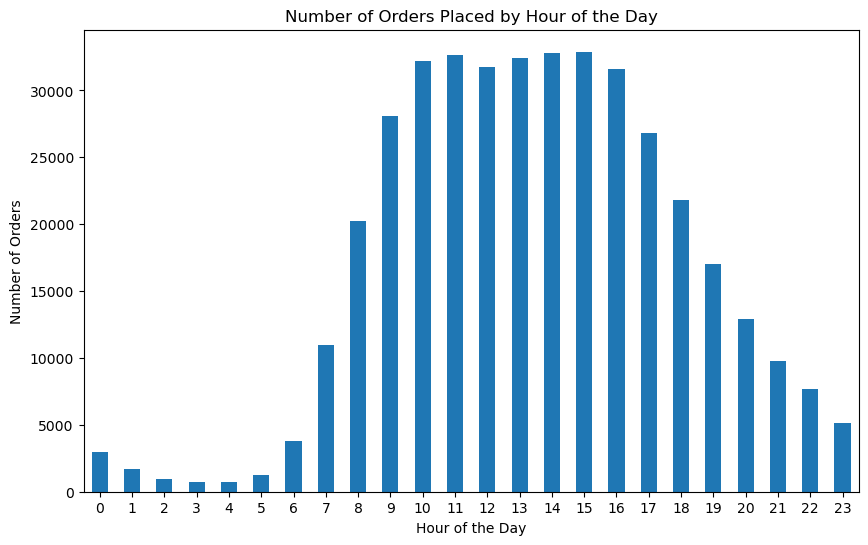

In [37]:
plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar')
plt.title('Number of Orders Placed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()


It's clear to me that the majority of people placing orders concentrate between 10 AM and 4 PM.

### Days of the week when people buy groceries

Before we continue, let's make a slight modification to the Instacart Orders DataFrame 🧙🏻‍♂️🪄✨✨✨✨✨
Let's add an additional seventh column called 'day_of_week' that gives us the names of the day of the week:

In [38]:
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

instacart_orders_df['day_of_week'] = instacart_orders_df['order_dow'].map(day_mapping)
print(instacart_orders_df.sample(10))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
347341    874427   165994             9          1                 15   
257581    422483    10704            33          2                 15   
271952   2307372     4698             4          0                 17   
285187   1657248   183125             1          3                 15   
438170   1815627    24294            22          4                 15   
136992   2095649     7161            14          4                  9   
64483    3148647   102178             9          3                 16   
260718    842883    67337            56          2                 12   
471584    304731   167061            28          4                  7   
165664   3175827    17302             3          6                  9   

        days_since_prior_order day_of_week  
347341                      30      Monday  
257581                       7     Tuesday  
271952                       9      Sunday  
285187          

Later on, we will start grouping the number of people placing orders for each day of the week.

In [39]:
daily_orders = instacart_orders_df.groupby('day_of_week')['user_id'].nunique()
print(daily_orders)

day_of_week
Friday       46127
Monday       56479
Saturday     45604
Sunday       57661
Thursday     44281
Tuesday      48587
Wednesday    45331
Name: user_id, dtype: int64


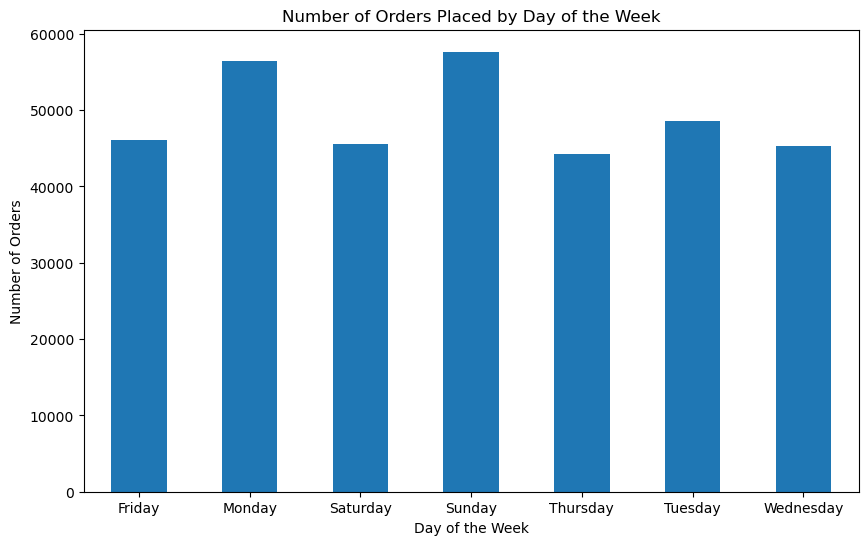

In [40]:
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='bar')
plt.title('Number of Orders Placed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()


The days came out unordered. Damn!
We'll have to resort to a slight redundancy of variables to reorder them.

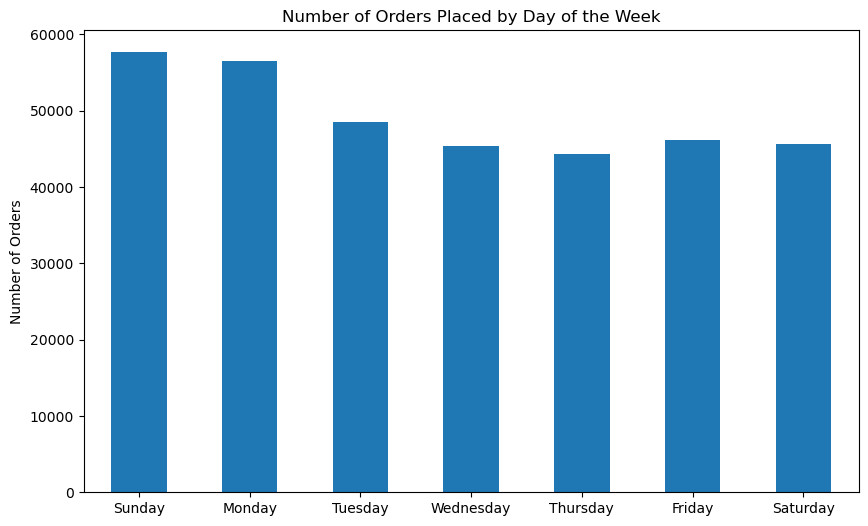

In [41]:
# Create a list with days ordered, respecting the original order of the 'order_dow' column:
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Apply the reindex method to the daily_orders variable that contains our grouped data for plotting:
daily_orders = daily_orders.reindex(ordered_days)

# Now create the plot
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='bar')
plt.title('Number of Orders Placed by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()


It's clear that Sundays and Mondays are the days when most people place orders.

### How long do people wait before placing another order?

To answer this question, it seems that a histogram is the appropriate visualization to understand the distribution of time intervals between successive orders.

By using this graph, we can easily identify the most common time intervals in which customers place their orders, allowing us to better understand their purchasing habits and enabling Instacart to plan more effective business strategies.

We'll start by verifying the minimum and maximum values in the days_since_prior_order column, as knowing these will help us create appropriate bins:

In [42]:
print("Minimum value in 'days_since_prior_order':", instacart_orders_df['days_since_prior_order'].min())
print("Maximum value in 'days_since_prior_order':", instacart_orders_df['days_since_prior_order'].max())

Minimum value in 'days_since_prior_order': 0
Maximum value in 'days_since_prior_order': 30


Perfect, with this number in mind, we will use 30 days as the basis for our bins.

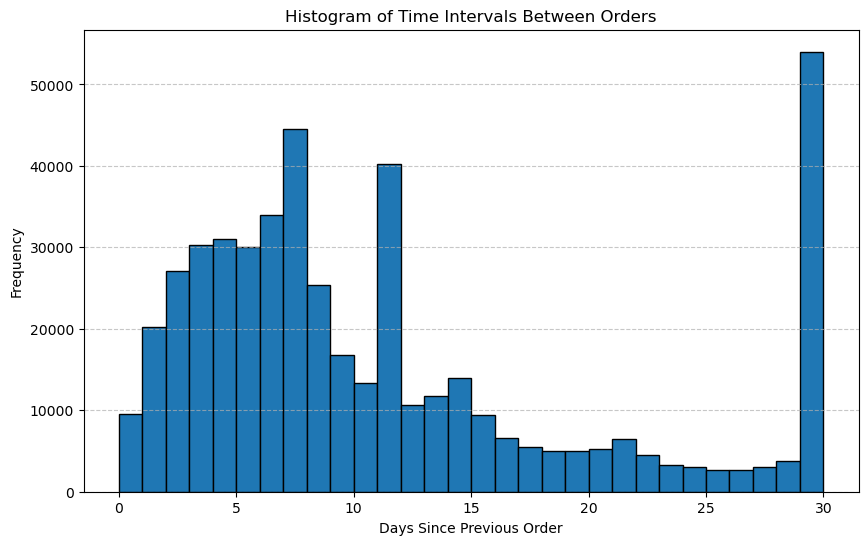

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(instacart_orders_df['days_since_prior_order'], bins=30, edgecolor='black')
plt.title('Histogram of Time Intervals Between Orders')
plt.xlabel('Days Since Previous Order')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To be honest, it wasn't clear to me during the Sprint how Python (Matplotlib) knows the frequencies at which purchases should occur on a given day.

Later on, I took the liberty of plotting a grouping that shows how many people wait to shop for each of the established days. First, we start by creating that grouping.

In [44]:
days_since_prior_order_counts = instacart_orders_df.groupby('days_since_prior_order')['user_id'].nunique().reset_index()

# Rename columns for better readability:
days_since_prior_order_counts.columns = ['Days Since Previous Order', 'Number of Users']

print(days_since_prior_order_counts)


    Days Since Previous Order  Number of Users
0                           0             7532
1                           1            13286
2                           2            17552
3                           3            20426
4                           4            22347
5                           5            23330
6                           6            26812
7                           7            32021
8                           8            21772
9                           9            15354
10                         10            12412
11                         11            38208
12                         12            10177
13                         13            11172
14                         14            13080
15                         15             9044
16                         16             6411
17                         17             5368
18                         18             4896
19                         19             4835
20           

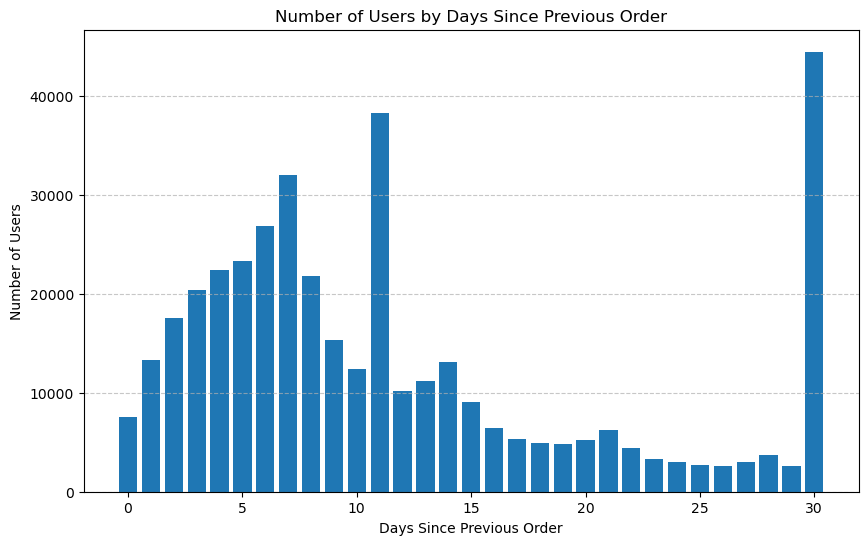

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(days_since_prior_order_counts['Days Since Previous Order'], days_since_prior_order_counts['Number of Users'])
plt.title('Number of Users by Days Since Previous Order')
plt.xlabel('Days Since Previous Order')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<b>Surprise!</b>, Here it seems there is a correlation.

The histogram of time until the next order revealed that most of the time, customers wait around 30 days between each order. This suggests that a 30-day interval between purchases is more common. However, we also observed that frequencies of 8 and 12 days are recurring, indicating that some customers tend to place orders at these time intervals.

When we proceeded to create a graph showing the number of users per waiting days, we observed a pattern similar to the histogram. The highest concentration of users is found in the 30-day interval, suggesting a widespread preference for this waiting period. However, this graph also highlights a notable preference for a 12-day interval compared to 8 days.

In conclusion, we can say that Instacart customers generally wait 30, 12, 8, and 7 days to make their purchases.

Based on the findings, we can conclude that the majority of shopping traffic on Instacart occurs during the morning and afternoon hours, specifically between 10 am and 4 pm.

Additionally, we have observed that the days with the highest shopping activity are Sundays and Mondays, suggesting these are key times to drive promotions and special offers.

Regarding preferred waiting days among users, intervals of 30, 12, 8, and 7 days stand out, indicating that customers have varied preferences regarding the time they wait between orders. However, these intervals suggest common ingrained habits such as monthly, bi-weekly, or weekly shopping routines, which are typical in this industry.

Considering these findings, Instacart could leverage these periods of peak activity to launch promotional campaigns targeted at the busiest days of the week. They could also devise strategies to boost sales during quieter days and times.

Finally, the platform could personalize offers and product recommendations based on users' preferred waiting intervals, potentially enhancing customer satisfaction and fostering brand loyalty.

## Data Analysis - Intermediate

- 1.- Is there any difference between the distributions of 'order_hour_of_day' on Wednesdays and Saturdays? I will plot bar charts of 'order_hour_of_day' for both days on the same figure and describe the differences I observe.

- 2.- I will plot the distribution for the number of orders made by customers (i.e., how many customers placed only 1 order, how many placed 2, how many placed 3, and so on...).

- 3.- What are the top 20 products that are most frequently ordered? I will show their identification and name.

### Difference between Wednesday and Saturday for 'order_hour_of_day'.

Alright, let's start by filtering the days into separate variables.

In [46]:
wednesday_orders = instacart_orders_df[instacart_orders_df['day_of_week'] == 'Wednesday']
saturday_orders = instacart_orders_df[instacart_orders_df['day_of_week'] == 'Saturday']

print(wednesday_orders['day_of_week'].head())
print('_'*50)
print(saturday_orders['day_of_week'].head())

6     Wednesday
16    Wednesday
28    Wednesday
30    Wednesday
35    Wednesday
Name: day_of_week, dtype: object
__________________________________________________
0     Saturday
11    Saturday
14    Saturday
20    Saturday
26    Saturday
Name: day_of_week, dtype: object


Now we're going to count the orders per hour for each of those days. We'll use the .value_counts method to get these frequencies and add .sort_index to sort them in ascending order.

In [47]:
# Count the number of orders placed each hour of the day for Wednesdays
wednesday_order_hours = wednesday_orders['order_hour_of_day'].value_counts().sort_index()

# Count the number of orders placed each hour of the day for Saturdays
saturday_order_hours = saturday_orders['order_hour_of_day'].value_counts().sort_index()

print('Order count per hour on Wednesday')
print()
print(wednesday_order_hours.head(24))
print('_'*50)
print('Order count per hour on Saturday')
print()
print(saturday_order_hours.head(24))

Order count per hour on Wednesday

order_hour_of_day
0      373
1      215
2      121
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64
__________________________________________________
Order count per hour on Saturday

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64


We proceed to create our plot that will compare both variables.

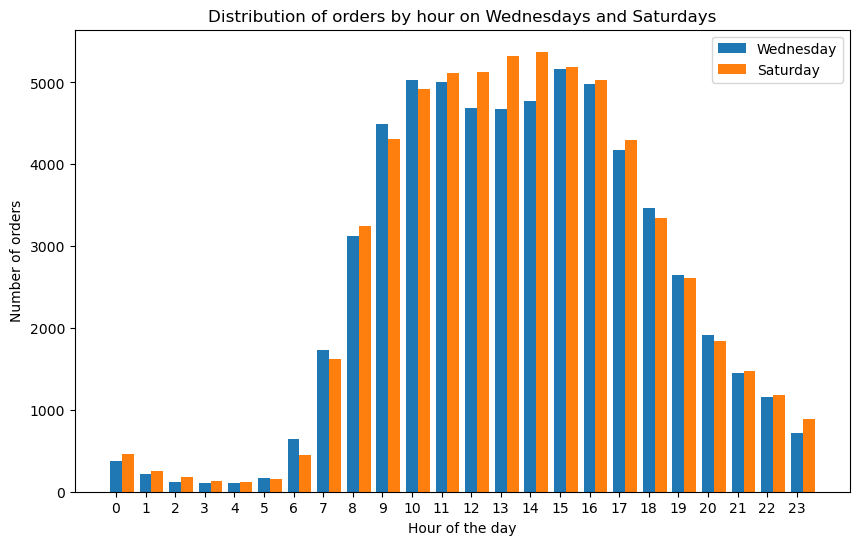

In [48]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for orders placed on Wednesdays
ax.bar(wednesday_order_hours.index, wednesday_order_hours.values, width=0.4, label='Wednesday')

# Plot the bars for orders placed on Saturdays, slightly offset to avoid overlap
ax.bar(saturday_order_hours.index + 0.4, saturday_order_hours.values, width=0.4, label='Saturday')

# Add labels and title
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Number of orders')
ax.set_title('Distribution of orders by hour on Wednesdays and Saturdays')
ax.set_xticks(range(24))
ax.legend()

# Show the plot
plt.show()


When comparing the order counts per hour between Wednesday and Saturday, several differences can be observed:

- a.- Peak Hours: On Wednesday, peak hours appear to be between 9 am and 4 pm, with a particularly high peak around 3 pm. In contrast, on Saturday, peak hours are also between 9 am and 4 pm, but with a more pronounced peak around 1 pm and 2 pm.

- b.- Traffic Distribution: Overall, orders on Wednesday seem to be more evenly distributed throughout the day, with a gradual decline towards the evening. In contrast, on Saturday, there is a more concentrated distribution during the morning and afternoon hours, with a steeper decline towards the night.

- c.- Order Volume: The total number of orders appears to be higher on Saturday compared to Wednesday, indicating increased shopping activity during the weekend.

These differences may reflect shopping habits and consumer behavior during weekdays versus weekends.

### Distribution for the number of orders per customer

First, we start by grouping the count of orders per customer:

In [49]:
orders_per_user = instacart_orders_df.groupby('user_id')['order_id'].count()
print(orders_per_user)

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64


With this information, we create a histogram:

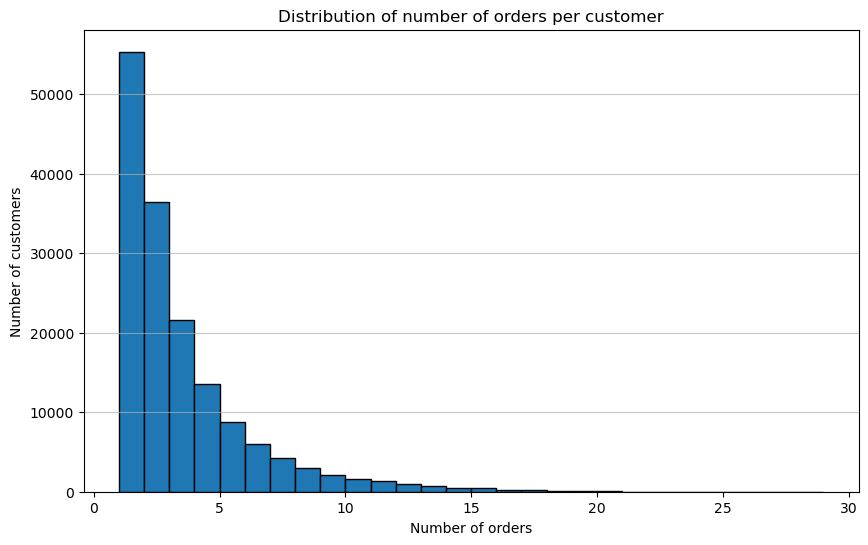

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_user, bins=range(1, orders_per_user.max() + 2), edgecolor='black')
plt.title('Distribution of number of orders per customer')
plt.xlabel('Number of orders')
plt.ylabel('Number of customers')
plt.grid(axis='y', alpha=0.7)
plt.show()

Here are my observations:

- a.- The number of orders per customer varies significantly, ranging from 1 to 9 orders.

- b.- Most customers appear to have placed a relatively low number of orders, as the maximum number of orders per customer is 9, and many customers placed only 1 or 2 orders.

- c.- However, there are also some customers who placed a considerably higher number of orders, with a maximum of 9 orders.

- d.- This suggests that there is diversity in customer purchasing behavior; some may be occasional shoppers while others are more frequent or regular in their purchases.

In summary, the distribution of the number of orders per customer is varied, with a concentration on a relatively low number of orders per customer, but also including some customers who place a significantly higher number of orders.

### Top 20 most popular products (showing their ID and name)

Okay, first we start by counting the best-selling products ordered from highest to lowest:

In [51]:
product_popularity = order_products_df['product_id'].value_counts().reset_index()
product_popularity.columns = ['product_id', 'popularity_count']
print(product_popularity.head(20))

    product_id  popularity_count
0        24852             66046
1        13176             53295
2        21137             37035
3        21903             33970
4        47209             29772
5        47766             24689
6        47626             21495
7        16797             20017
8        26209             19689
9        27845             19600
10       27966             19194
11       22935             15897
12       24964             15290
13       45007             14584
14       39275             13879
15       49683             13674
16       28204             12544
17        5876             12231
18        8277             11992
19       40706             11781


Now, we apply the .merge method to the newly created variable and the products_df DataFrame, which will display the columns 'product_id', the product count, and the product name. The merge is based on the column they both share ('product_id').

In [52]:
popular_products = pd.merge(product_popularity.head(20), products_df[['product_id', 'product_name']], on='product_id')
print(popular_products.head(20))

    product_id  popularity_count              product_name
0        24852             66046                    Banana
1        13176             53295    Bag of Organic Bananas
2        21137             37035      Organic Strawberries
3        21903             33970      Organic Baby Spinach
4        47209             29772      Organic Hass Avocado
5        47766             24689           Organic Avocado
6        47626             21495               Large Lemon
7        16797             20017              Strawberries
8        26209             19689                     Limes
9        27845             19600        Organic Whole Milk
10       27966             19194       Organic Raspberries
11       22935             15897      Organic Yellow Onion
12       24964             15290            Organic Garlic
13       45007             14584          Organic Zucchini
14       39275             13879       Organic Blueberries
15       49683             13674            Cucumber Kir

I will plot this table as a horizontal bar chart to get a better understanding of the top-selling products.

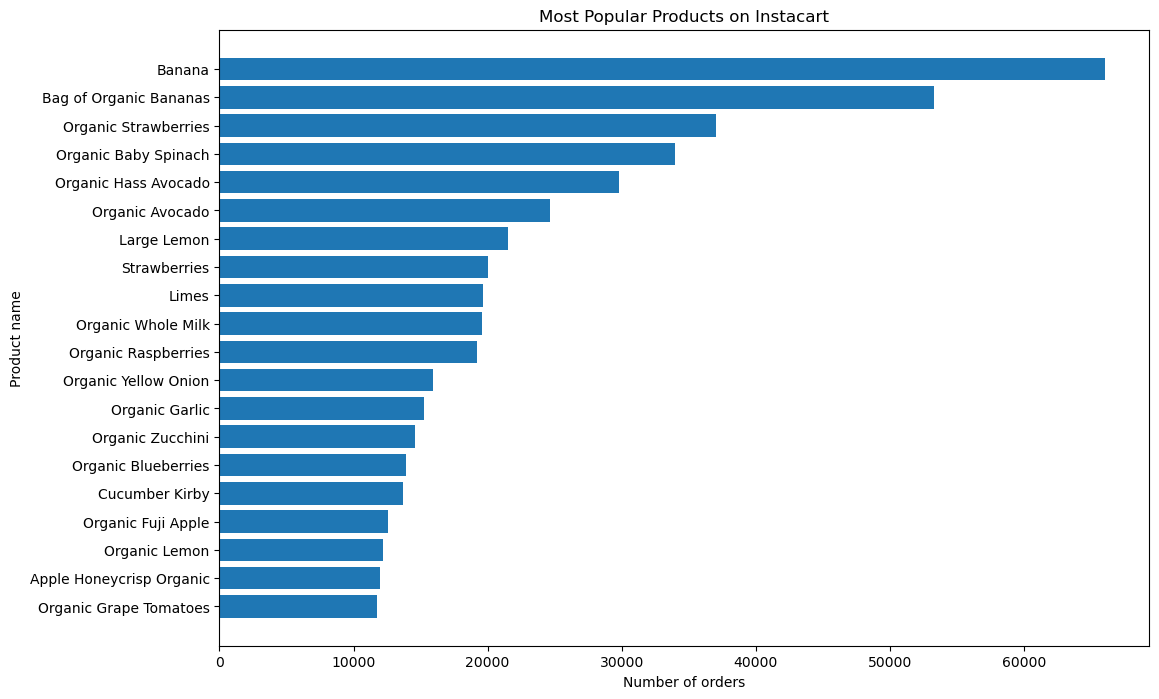

In [53]:
plt.figure(figsize=(12, 8))
plt.barh(popular_products['product_name'], popular_products['popularity_count'])

plt.xlabel('Number of orders')
plt.ylabel('Product name')
plt.title('Most Popular Products on Instacart')

plt.gca().invert_yaxis()

plt.show()


<b>Here are my conclusions:</b>

<b>a.- Most popular products:</b> The most popular products are mainly organic fruits and vegetables, suggesting that Instacart's customers have a preference for fresh, healthy, and organic products.

Instacart likely already understands its customers well. If not, this table provides valuable insights that could contribute to better marketing campaigns and overall strategy.

<b>b.- Product diversity:</b> Although the most popular products are predominantly fruits and vegetables, there is also a significant presence of other products, such as dairy.

In summary, the results reflect a trend towards a healthy lifestyle and environmental consciousness.

## Data Analysis - Advanced

- 1.- How many items do people usually buy per order? What is the distribution like?

- 2.- What are the top 20 items that are most frequently reordered (show their names and product IDs)?

- 3.- For each product, what is the reorder rate (number of reorder occurrences / total orders)?

- 4.- For each customer, what proportion of the products they ordered had already been ordered before? Calculate the reorder rate for each user instead of for each product.

- 5.- What are the top 20 items that people add first to their carts (show the product IDs, their names, and the number of times they were the first item added to the cart)?

### Count of items people typically buy in an order.

Okay, in this attempt, what I will do is calculate the average number of items per order for each user, assuming that the statement 'how many items do people NORMALLY buy in an order' is asking precisely for an average.

In [54]:
average_items_per_order = instacart_orders_df.groupby('user_id')['order_number'].mean()

print("Average items per order per user:", average_items_per_order)
print()
print("Minimum average per user:", average_items_per_order.min())
print()
print("Maximum average per user:", average_items_per_order.max())

Average items per order per user: user_id
2          2.500000
4          4.000000
5          4.000000
6          2.500000
7         16.000000
            ...    
206203     2.000000
206206    35.142857
206207     8.000000
206208    23.555556
206209     8.500000
Name: order_number, Length: 157437, dtype: float64

Minimum average per user: 1.0

Maximum average per user: 83.66666666666667


Later, we created that histogram with 83 bins for a better appreciation of the distributions.

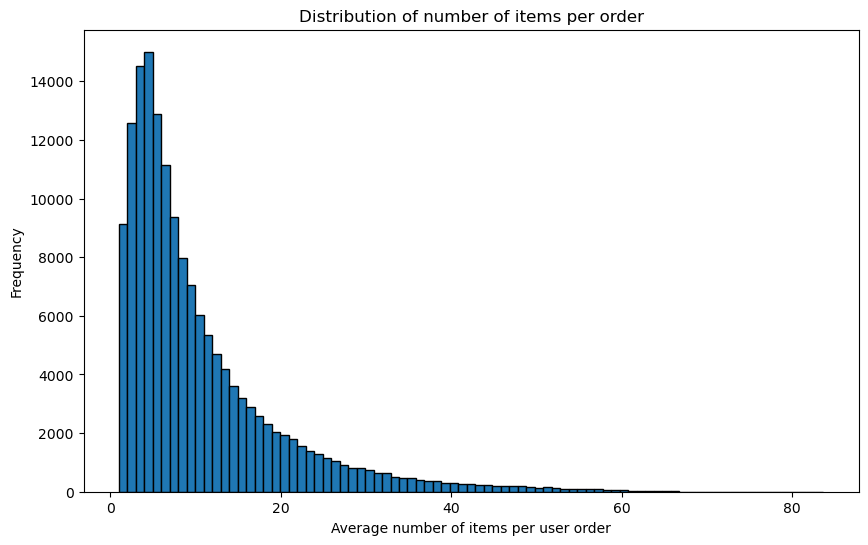

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(average_items_per_order, bins=83, edgecolor='black')
plt.title('Distribution of number of items per order')
plt.xlabel('Average number of items per user order')
plt.ylabel('Frequency')
plt.show()

The histogram shows us that the highest frequency of average item numbers per user order is 4 items. In other words, NORMALLY, a person buys 4 items per purchase.

### Top 20 items that are most frequently reordered

We started by filtering all products that have been reordered at least once, where 0 means a customer has never reordered it and 1 means they have. Next, we counted how many times each filtered product has been reordered.

In [56]:
reordered_products = order_products_df[order_products_df['reordered'] == 1]

reordered_product_counts = reordered_products['product_id'].value_counts().reset_index()
reordered_product_counts.columns = ['product_id', 'reorder_count']

print(reordered_product_counts.head())

   product_id  reorder_count
0       24852          55761
1       13176          44448
2       21137          28637
3       21903          26232
4       47209          23628


Okay, in this previous table, we're already starting to see some familiar IDs. I'll proceed to label them with their names.

In [57]:
popular_reordered_products = pd.merge(reordered_product_counts, products_df[['product_id', 'product_name']], on='product_id')

print(popular_reordered_products.head(20))

    product_id  reorder_count              product_name
0        24852          55761                    Banana
1        13176          44448    Bag of Organic Bananas
2        21137          28637      Organic Strawberries
3        21903          26232      Organic Baby Spinach
4        47209          23628      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14747       Organic Raspberries
9        16797          13944              Strawberries
10       26209          13326                     Limes
11       22935          11144      Organic Yellow Onion
12       24964          10409            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8835  Apple Honeycrisp 

When creating this table of the top 20 most reordered products, it's impossible not to compare it with the list of the 20 most popular products we compiled earlier. In that comparison, we can identify interesting patterns in customer purchasing preferences.

Naturally, when noting similarities, we observe a tendency towards organic products, fruits, vegetables, and dairy products in both lists. The presence of items like 'Banana,' 'Bag of Organic Bananas,' 'Organic Strawberries,' and 'Organic Baby Spinach' suggests that these items are essential in customers' grocery purchases.

However, while the order of these products varies slightly between the two categories, it suggests that although these products are highly popular among customers, the frequency of their reordering would prompt the company to reconsider inventory planning and marketing strategies on Instacart.

### For each product, what is the proportion of times it is ordered and reordered?

Starting with the base of having a total of 4,544,171 ordered products, we will add an additional column to our already existing table of the top 20 most reordered products.

In [58]:
total_orders = 4544171

popular_reordered_products['reorder_rate'] = popular_reordered_products['reorder_count'] / total_orders * 100

print('Reorder rate of products in percentage')
print()
print(popular_reordered_products[['product_id', 'product_name', 'reorder_count', 'reorder_rate']])

Reorder rate of products in percentage

       product_id                                product_name  reorder_count  \
0           24852                                      Banana          55761   
1           13176                      Bag of Organic Bananas          44448   
2           21137                        Organic Strawberries          28637   
3           21903                        Organic Baby Spinach          26232   
4           47209                        Organic Hass Avocado          23628   
...           ...                                         ...            ...   
36222       20864  Toilet Wand with Storage Caddy Starter Kit              1   
36223       42353            Original Creamy Hot Wheat Cereal              1   
36224       41991                  Chicken Parmesan and Penne              1   
36225       27600                      Milk Chocolate Peanuts              1   
36226       47673  Toast Chee Peanut Butter Sandwich Crackers              1   


I've found it a bit challenging to understand the nature of this particular question, but here's my second attempt, based on the reviewer's feedback:

* First, we start by grouping by 'product_id' and calculate the sum of 'reordered' along with the total count of 'order_id'.
* Next, we calculate the proportion of reorderings for each product.

In [59]:
product_reordered_counts = order_products_df.groupby('product_id').agg({'reordered': 'sum', 'order_id': 'count'}).reset_index()
product_reordered_counts['reorder_ratio'] = product_reordered_counts['reordered'] / product_reordered_counts['order_id']*100

print(product_reordered_counts)

       product_id  reordered  order_id  reorder_ratio
0               1        158       280      56.428571
1               2          0        11       0.000000
2               3         31        42      73.809524
3               4         25        49      51.020408
4               7          1         2      50.000000
...           ...        ...       ...            ...
45567       49690          4         5      80.000000
45568       49691         31        72      43.055556
45569       49692          5        12      41.666667
45570       49693         11        25      44.000000
45571       49694          3         9      33.333333

[45572 rows x 4 columns]


Okay, now we merge it with products_df to associate the product names with each ID.

In [60]:
product_reordered_counts = pd.merge(product_reordered_counts, products_df[['product_id', 'product_name']], on='product_id')

Finally, we work our magic and hope that this is the result we're being asked for! 🧙🏻‍♂️🪄✨✨✨✨

In [61]:
print(product_reordered_counts[['product_id', 'product_name', 'reorder_ratio']].head())

   product_id                                       product_name  \
0           1                         Chocolate Sandwich Cookies   
1           2                                   All-Seasons Salt   
2           3               Robust Golden Unsweetened Oolong Tea   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4           7                     Pure Coconut Water With Orange   

   reorder_ratio  
0      56.428571  
1       0.000000  
2      73.809524  
3      51.020408  
4      50.000000  


The reorder rate shows how likely it is for a customer to reorder a specific product after purchasing it once.

For example, the product with the highest reorder rate in this list is bananas, with approximately 1.23% of all total orders being reordered. This indicates that more than 1% of all orders include bananas being reordered.

In summary, this new column provides valuable information about which products are popular among customers and how likely they are to be reordered. This is useful for understanding customer purchasing habits and optimizing product offerings on the Instacart platform.

### For each customer, what proportion of their products had already been ordered before?

The request states: 'For each customer, what proportion of the products they ordered had they already ordered before? Calculate the reorder rate for each user instead of each product.'

First, we obtain the total number of users:

In [62]:
unique_users = instacart_orders_df['user_id'].nunique()
print("Number of unique user_ids:", unique_users)

Number of unique user_ids: 157437


We're aiming to obtain the same table of the top 20 most reordered products, but this time, we want to know this by customer, correct?

In [63]:
popular_reordered_products['tasa_repetición_usuarios'] = popular_reordered_products['reorder_count'] / unique_users * 100

print('Reorder rate per users in percentage')
print()
print(popular_reordered_products[['product_id', 'product_name', 'tasa_repetición_usuarios']])


Reorder rate per users in percentage

       product_id                                product_name  \
0           24852                                      Banana   
1           13176                      Bag of Organic Bananas   
2           21137                        Organic Strawberries   
3           21903                        Organic Baby Spinach   
4           47209                        Organic Hass Avocado   
...           ...                                         ...   
36222       20864  Toilet Wand with Storage Caddy Starter Kit   
36223       42353            Original Creamy Hot Wheat Cereal   
36224       41991                  Chicken Parmesan and Penne   
36225       27600                      Milk Chocolate Peanuts   
36226       47673  Toast Chee Peanut Butter Sandwich Crackers   

       tasa_repetición_usuarios  
0                     35.417977  
1                     28.232245  
2                     18.189498  
3                     16.661903  
4          

The high reorder rate for certain products, such as bananas and organic bananas, suggests strong customer loyalty to these specific items. For instance, 35% of customers who have purchased bananas tend to reorder them regularly, indicating a stable preference.

This insight suggests marketing opportunities. Identifying products with the highest reorder rates can provide opportunities for targeted marketing strategies, such as special promotions or personalized recommendations, aimed at further encouraging repeat orders and increasing customer loyalty.

### Top 20 items that people put first in their carts

Okay, let's start over with the filtering. This time, we filter for products that were the first item added to the cart and apply the .value_counts method to count the frequencies of each product.

In [64]:
first_in_cart = order_products_df[order_products_df['add_to_cart_order'] == 1]

top_first_products = first_in_cart['product_id'].value_counts().reset_index()
top_first_products.columns = ['product_id', 'add_to_cart_count']

We obtain the names of these first-preference products.

In [65]:
top_first_products = pd.merge(top_first_products.head(20), products_df[['product_id', 'product_name']], on='product_id')

Let's work our magic 🧙🏻‍♂️🪄✨✨✨✨✨

In [66]:
print(top_first_products[['product_id', 'product_name', 'add_to_cart_count']])

    product_id                 product_name  add_to_cart_count
0        24852                       Banana              15562
1        13176       Bag of Organic Bananas              11026
2        27845           Organic Whole Milk               4363
3        21137         Organic Strawberries               3946
4        47209         Organic Hass Avocado               3390
5        21903         Organic Baby Spinach               3336
6        47766              Organic Avocado               3044
7        19660                 Spring Water               2336
8        16797                 Strawberries               2308
9        27966          Organic Raspberries               2024
10       44632   Sparkling Water Grapefruit               1914
11       49235          Organic Half & Half               1797
12       47626                  Large Lemon               1737
13         196                         Soda               1733
14       38689     Organic Reduced Fat Milk            

After reviewing the latest tables with the top 20 products according to various criteria we've been asked for, the reality is that these products don't change much; for example, Bananas and Bag of Organic Bananas continue to be two of the most popular products that people tend to add first to their carts, with a significantly higher quantity than other products. This suggests that customers consider these products essential or prioritized in their purchases.

In summary, this list continues to reflect a combination of fresh produce, dairy, and some beverages that customers typically consider their first choices when starting their online shopping.

Personally, I'm curious: Is this preference legitimate, or is it a bias due to the placement of products on the Instacart page? 🤔